### Preliminary wrangling.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from datetime import datetime
import chardet
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('Table-S7-singleyr-2019[1].csv' )

In [3]:
data

,authfull,inst_name,cntry,np6019,firstyr,lastyr,rank (ns),nc1919 (ns),h19 (ns),hm19 (ns),...,nc1919_d,sm-subfield-1,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),sm-subfield-1 count
0,"Wang, Zhong Lin",Georgia Institute of Technology,usa,1754,1986,2020,1,30071,74,41.875235,...,54,Nanoscience & Nanotechnology,0.586400,Applied Physics,0.109794,Enabling & Strategic Technologies,0.711167,1.0,1.0,75210.0
1,"Kresse, Georg",Universitat Wien,aut,355,1992,2020,2,31829,32,18.929175,...,1,Applied Physics,0.440120,Chemical Physics,0.257485,Physics & Astronomy,0.889222,1.0,1.0,224856.0
2,"Grätzel, Michael",Ecole Polytechnique Fédérale de Lausanne,che,1567,1971,2020,3,36503,85,37.340521,...,15,Nanoscience & Nanotechnology,0.229272,Organic Chemistry,0.120135,Enabling & Strategic Technologies,0.432318,2.0,2.0,75210.0
3,"Bengio, Yoshua",Montreal Institute for Learning Algorithms,can,369,1988,2020,4,43961,57,26.562470,...,259,Artificial Intelligence & Image Processing,0.642336,Experimental Psychology,0.156934,Information & Communication Technologies,0.682482,1.0,1.0,215114.0
4,"Newman, M. E.J.","University of Michigan, Ann Arbor",usa,188,1991,2019,5,12215,41,32.583333,...,56,Fluids & Plasmas,0.696970,General Physics,0.115152,Physics & Astronomy,0.836364,1.0,1.0,43218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43637,"Perry, Chris",University of Exeter,gbr,106,1994,2020,43638,459,11,6.472823,...,0,Marine Biology & Hydrobiology,0.303030,Geology,0.151515,Earth & Environmental Sciences,0.565657,217.0,289.0,37726.0
43638,"Daly, Mary B.",Fox Chase Cancer Center,usa,323,1975,2020,43639,1760,19,4.985484,...,3,Oncology & Carcinogenesis,0.547794,Genetics & Heredity,0.121324,Clinical Medicine,0.621324,1369.0,1525.0,230678.0
43639,"Chang, Zenghu",University of Central Florida,usa,295,1996,2020,43640,713,13,6.922594,...,0,Optics,0.463415,Optoelectronics & Photonics,0.261324,Physics & Astronomy,0.721254,224.0,223.0,56325.0
43640,"Carpenter, Gail A.",Boston University,usa,97,1977,2019,43641,378,9,6.283333,...,2,Artificial Intelligence & Image Processing,0.739130,Geological & Geomatics Engineering,0.086957,Information & Communication Technologies,0.739130,1131.0,1147.0,215114.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   authfull                 43642 non-null  object 
 1   inst_name                43502 non-null  object 
 2   cntry                    43106 non-null  object 
 3   np6019                   43642 non-null  int64  
 4   firstyr                  43642 non-null  int64  
 5   lastyr                   43642 non-null  int64  
 6   rank (ns)                43642 non-null  int64  
 7   nc1919 (ns)              43642 non-null  int64  
 8   h19 (ns)                 43642 non-null  int64  
 9   hm19 (ns)                43642 non-null  float64
 10  nps (ns)                 43642 non-null  int64  
 11  ncs (ns)                 43642 non-null  int64  
 12  cpsf (ns)                43642 non-null  int64  
 13  ncsf (ns)                43642 non-null  int64  
 14  npsfl (ns)            

In [5]:
institution_count = data.groupby('inst_name').size().sort_values()
institution_count = list(set(institution_count.tolist()))
institution_count

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 87,
 89,
 90,
 92,
 94,
 95,
 96,
 97,
 99,
 104,
 105,
 107,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 124,
 127,
 130,
 132,
 133,
 135,
 137,
 138,
 141,
 143,
 150,
 152,
 153,
 159,
 164,
 165,
 166,
 168,
 171,
 173,
 182,
 183,
 185,
 188,
 191,
 195,
 205,
 219,
 237,
 242,
 250,
 253,
 265,
 274,
 295,
 311,
 315,
 325,
 382,
 403]

In [6]:
data.inst_name.tolist()

['Georgia Institute of Technology',
 'Universitat Wien',
 'Ecole Polytechnique Fédérale de Lausanne',
 'Montreal Institute for Learning Algorithms',
 'University of Michigan, Ann Arbor',
 'Stanford University',
 'University of Toronto',
 'University of Oxford',
 'Harvard Medical School',
 'Stanford University',
 'Babol Noshirvani University of Technology',
 'Temple University',
 'University of California, Berkeley',
 'Universität Bonn',
 'Dalhousie University',
 'UCL Queen Square Institute of Neurology',
 'Howard Hughes Medical Institute',
 'University of Manchester',
 'The University of Texas at Austin',
 'University of Virginia',
 'Rockefeller University',
 'Australian Catholic University',
 'Harvard T.H. Chan School of Public Health',
 'Stanford University',
 'Ottawa Hospital Research Institute',
 'University of California, Berkeley',
 'Johns Hopkins School of Medicine',
 'Department of Psychological and Brain Sciences',
 'Harvard University',
 'Sichuan University',
 'University of 

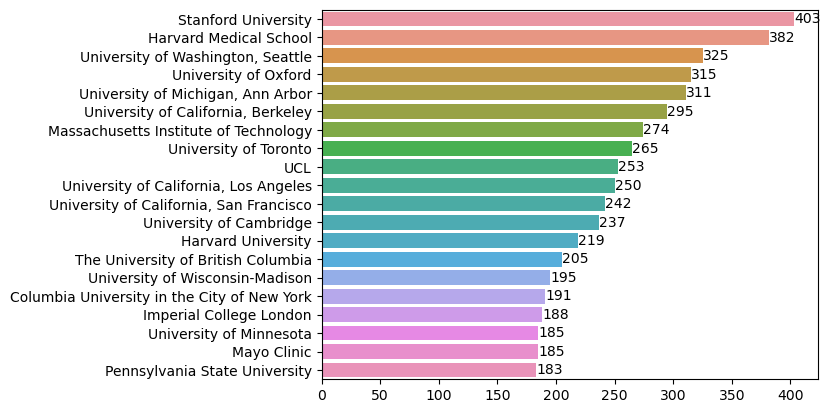

<Figure size 1500x1500 with 0 Axes>

In [7]:
highest_institution_count = data['inst_name'].value_counts().nlargest(20)
ax = sb.barplot(y= highest_institution_count.index, x = highest_institution_count.values);
for i in ax.containers:
    ax.bar_label(i,)
plt.figure(figsize=(15,15));
plt.show();

In [8]:
highest_institution_count

Stanford University                            403
Harvard Medical School                         382
University of Washington, Seattle              325
University of Oxford                           315
University of Michigan, Ann Arbor              311
University of California, Berkeley             295
Massachusetts Institute of Technology          274
University of Toronto                          265
UCL                                            253
University of California, Los Angeles          250
University of California, San Francisco        242
University of Cambridge                        237
Harvard University                             219
The University of British Columbia             205
University of Wisconsin-Madison                195
Columbia University in the City of New York    191
Imperial College London                        188
University of Minnesota                        185
Mayo Clinic                                    185
Pennsylvania State University  

In [9]:
data['cntry'].value_counts().tail(60)

isl    13
cyp    13
lux    12
lbn    11
nga    11
bgr    10
est    10
jor    10
svk     9
mac     9
omn     7
srb     7
col     6
ltu     6
pri     5
hrv     5
pan     5
jam     5
gha     5
ury     4
bgd     4
phl     4
kaz     4
tun     4
per     4
kwt     4
ukr     4
irq     3
ecu     3
ken     3
blr     2
mda     2
mar     2
bhr     2
brn     2
lie     2
tza     2
mne     2
gmb     2
mus     2
npl     1
mdg     1
eth     1
bih     1
tjk     1
bwa     1
arm     1
pse     1
lka     1
pyf     1
ven     1
cmr     1
lva     1
mco     1
sen     1
dza     1
uzb     1
cri     1
hnd     1
idn     1
Name: cntry, dtype: int64

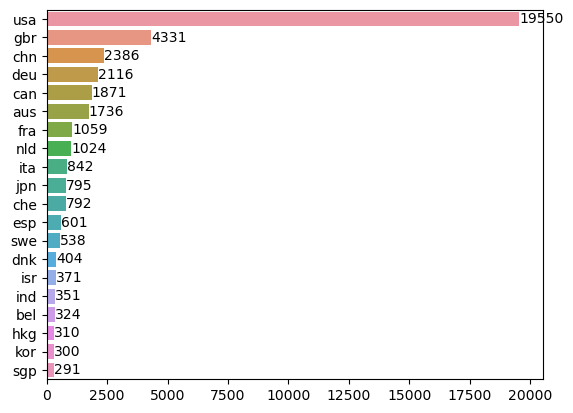

<Figure size 1500x1500 with 0 Axes>

In [10]:
highest_country_count = data['cntry'].value_counts().nlargest(20)
ax = sb.barplot(y= highest_country_count.index, x = highest_country_count.values);
for i in ax.containers:
    ax.bar_label(i,)
plt.figure(figsize=(15,15));
plt.show();

In [11]:
data.columns

Index(['authfull', 'inst_name', 'cntry', 'np6019', 'firstyr', 'lastyr',
       'rank (ns)', 'nc1919 (ns)', 'h19 (ns)', 'hm19 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6019 cited1919 (ns)',
       'self%', 'rank', 'nc1919', 'h19', 'hm19', 'nps', 'ncs', 'cpsf', 'ncsf',
       'npsfl', 'ncsfl', 'c', 'npciting', 'cprat', 'np6019 cited1919',
       'np6019_d', 'nc1919_d', 'sm-subfield-1', 'sm-subfield-1-frac',
       'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field', 'sm-field-frac',
       'rank sm-subfield-1', 'rank sm-subfield-1 (ns)', 'sm-subfield-1 count'],
      dtype='object')

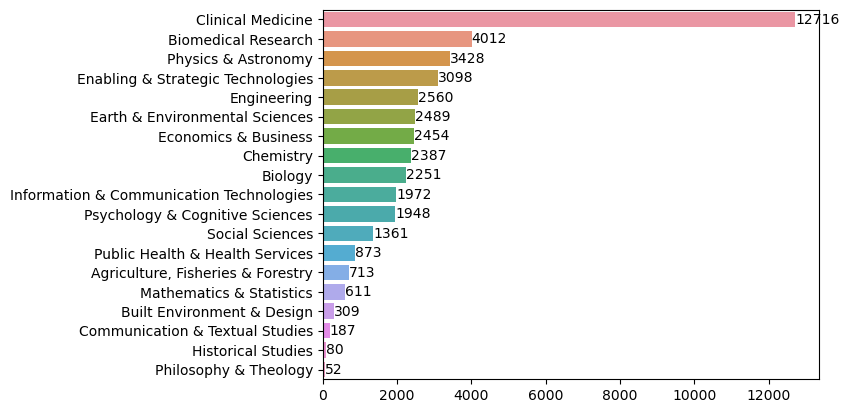

<Figure size 1500x1500 with 0 Axes>

In [12]:
highest_field_count = data['sm-field'].value_counts().nlargest(20)
ax = sb.barplot(y= highest_field_count.index, x = highest_field_count.values);
for i in ax.containers:
    ax.bar_label(i,)
plt.figure(figsize=(15,15));
plt.show();

In [13]:
highest_field_count

Clinical Medicine                           12716
Biomedical Research                          4012
Physics & Astronomy                          3428
Enabling & Strategic Technologies            3098
Engineering                                  2560
Earth & Environmental Sciences               2489
Economics & Business                         2454
Chemistry                                    2387
Biology                                      2251
Information & Communication Technologies     1972
Psychology & Cognitive Sciences              1948
Social Sciences                              1361
Public Health & Health Services               873
Agriculture, Fisheries & Forestry             713
Mathematics & Statistics                      611
Built Environment & Design                    309
Communication & Textual Studies               187
Historical Studies                             80
Philosophy & Theology                          52
Name: sm-field, dtype: int64

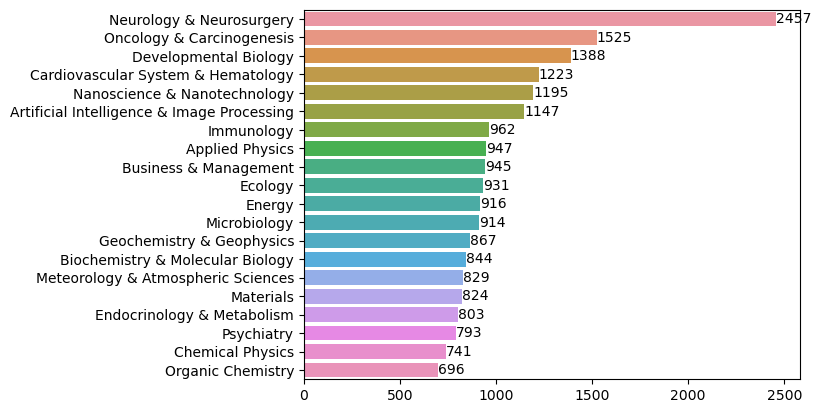

<Figure size 1500x1500 with 0 Axes>

In [14]:
highest_sub_field_1_count = data['sm-subfield-1'].value_counts().nlargest(20)
ax = sb.barplot(y= highest_sub_field_1_count.index, x = highest_sub_field_1_count.values);
for i in ax.containers:
    ax.bar_label(i,)
plt.figure(figsize=(15,15));
plt.show();

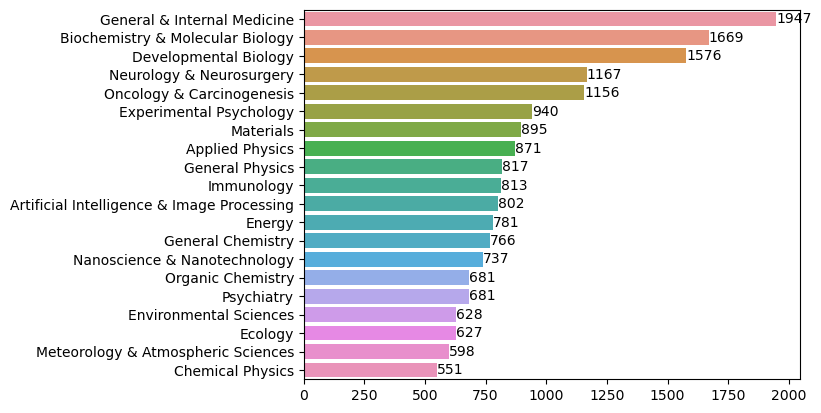

<Figure size 1500x1500 with 0 Axes>

In [15]:
highest_sub_field_2_count = data['sm-subfield-2'].value_counts().nlargest(20)
ax = sb.barplot(y= highest_sub_field_2_count.index, x = highest_sub_field_2_count.values);
for i in ax.containers:
    ax.bar_label(i,)
plt.figure(figsize=(15,15));
plt.show();

In [16]:
nigeria_data = data[data['cntry'] == 'nga']
nigeria_data

,authfull,inst_name,cntry,np6019,firstyr,lastyr,rank (ns),nc1919 (ns),h19 (ns),hm19 (ns),...,nc1919_d,sm-subfield-1,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),sm-subfield-1 count
7082,"Gureje, Oye",University of Ibadan,nga,388,1986,2020,7083,5947,33,7.614586,...,4,Psychiatry,0.585209,General & Internal Medicine,0.073955,Clinical Medicine,0.858521,181.0,167.0,56373.0
10960,"Oguzie, Emeka E.","Federal University of Technology, Owerri",nga,107,2004,2020,10961,794,16,8.959524,...,4,Materials,0.264706,Energy,0.245098,Enabling & Strategic Technologies,0.509804,228.0,190.0,177931.0
11007,"Olajire, Abass A.",Ladoke Akintola University of Technology,nga,63,1993,2020,11008,484,10,10.000000,...,4,Environmental Sciences,0.315789,General Chemistry,0.157895,Earth & Environmental Sciences,0.350877,128.0,108.0,66925.0
11849,"Olusanya, Bolajoko Olubukunola",Centre for Healthy Start Initiative,nga,196,2000,2020,11850,9569,31,4.470318,...,22,Pediatrics,0.270968,General & Internal Medicine,0.245161,Clinical Medicine,0.793548,23.0,25.0,49820.0
14524,"Ezugwu, Emmanuel Okechukwu",Air Force Institute of Technology,nga,89,1987,2020,14525,757,12,6.883333,...,6,Mechanical Engineering & Transports,0.391892,Industrial Engineering & Automation,0.351351,Engineering,0.743243,189.0,145.0,92645.0
19754,"Oboh, Ganiyu","Federal University of Technology, Akure",nga,298,2001,2020,19755,979,12,8.777778,...,3,Food Science,0.276224,Nutrition & Dietetics,0.160839,"Agriculture, Fisheries & Forestry",0.328671,78.0,99.0,48453.0
31502,"Lawal, O. S.","Federal University, Oye-Ekiti",nga,44,2002,2018,31503,314,11,8.259524,...,0,Food Science,0.590909,Polymers,0.204545,"Agriculture, Fisheries & Forestry",0.590909,219.0,186.0,48453.0
33729,"Farombi, Ebenezer O.",University of Ibadan,nga,208,1997,2020,33730,730,12,7.334524,...,2,Toxicology,0.352332,Biochemistry & Molecular Biology,0.093264,Biomedical Research,0.497409,128.0,133.0,45124.0
37989,"Owolabi, Mayowa",University of Ibadan,nga,176,2003,2020,37990,6275,27,3.598072,...,8,Neurology & Neurosurgery,0.380645,General & Internal Medicine,0.187097,Clinical Medicine,0.812903,1261.0,2168.0,227881.0
42438,"Alaneme, Kenneth K.","Federal University of Technology, Akure",nga,78,2005,2020,42439,562,13,7.583333,...,16,Materials,0.426471,Mechanical Engineering & Transports,0.220588,Enabling & Strategic Technologies,0.544118,711.0,798.0,177931.0


In [17]:
Institution_count_in_nga = nigeria_data['inst_name'].value_counts()
Institution_count_in_nga

University of Ibadan                        3
Federal University of Technology, Akure     2
Federal University of Technology, Owerri    1
Ladoke Akintola University of Technology    1
Centre for Healthy Start Initiative         1
Air Force Institute of Technology           1
Federal University, Oye-Ekiti               1
Federal Teaching Hospital Abakaliki         1
Name: inst_name, dtype: int64

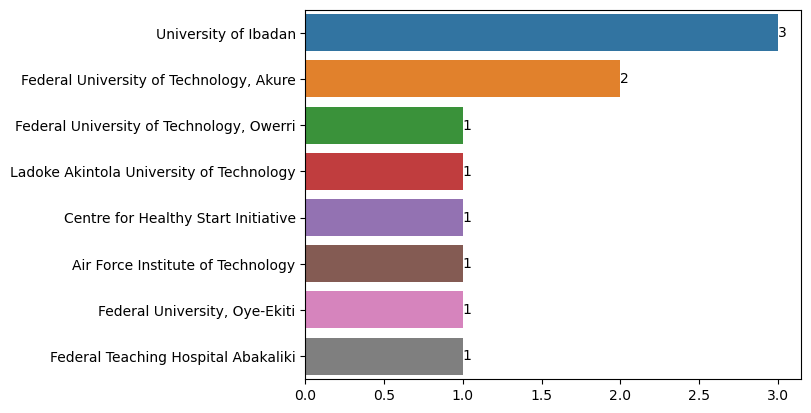

<Figure size 1500x1500 with 0 Axes>

In [19]:
ax = sb.barplot(y= Institution_count_in_nga.index, x = Institution_count_in_nga.values);
for i in ax.containers:
    ax.bar_label(i,)
plt.figure(figsize=(15,15));
plt.show();

Text(0.5, 1.0, 'Scentist in Nigeria among Stanford top 2% scientist and their distribution in Tertiary institutions')

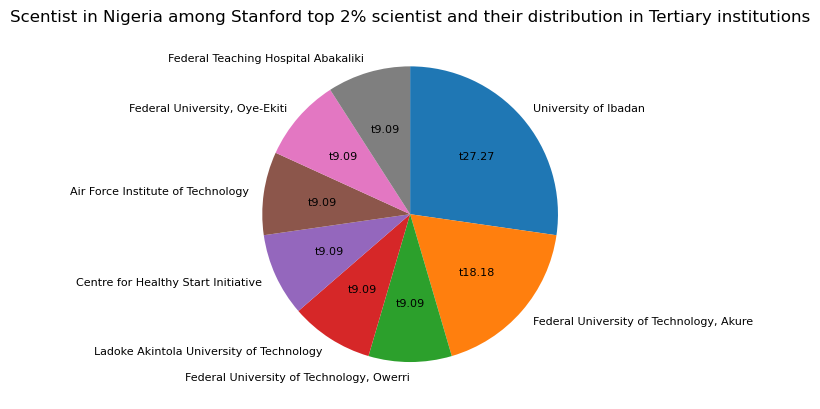

In [20]:
plt.pie(Institution_count_in_nga.values, labels = Institution_count_in_nga.index, startangle = 90, autopct='t%.2f', counterclock = False, textprops={'fontsize': 8}, );
plt.title('Scentist in Nigeria among Stanford top 2% scientist and their distribution in Tertiary institutions')

<AxesSubplot:xlabel='nc1919 (ns)', ylabel='firstyr'>

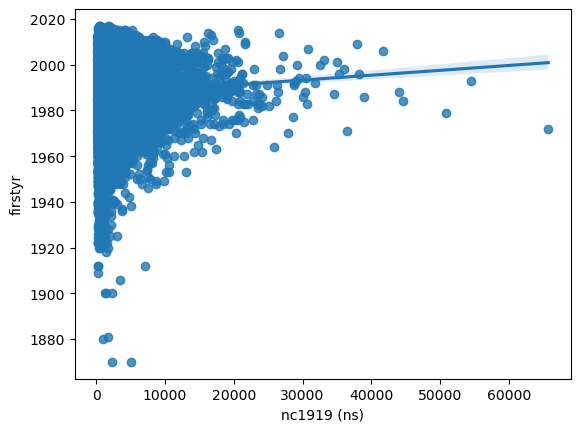

In [21]:
sb.regplot(y='firstyr', x='nc1919 (ns)', data = data)

In [22]:
data.columns

Index(['authfull', 'inst_name', 'cntry', 'np6019', 'firstyr', 'lastyr',
       'rank (ns)', 'nc1919 (ns)', 'h19 (ns)', 'hm19 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6019 cited1919 (ns)',
       'self%', 'rank', 'nc1919', 'h19', 'hm19', 'nps', 'ncs', 'cpsf', 'ncsf',
       'npsfl', 'ncsfl', 'c', 'npciting', 'cprat', 'np6019 cited1919',
       'np6019_d', 'nc1919_d', 'sm-subfield-1', 'sm-subfield-1-frac',
       'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field', 'sm-field-frac',
       'rank sm-subfield-1', 'rank sm-subfield-1 (ns)', 'sm-subfield-1 count'],
      dtype='object')

In [23]:
data['num_publ'] = data[['nps (ns)', 'cpsf (ns)', 'npsfl (ns)']].apply(lambda x : x.sum(), axis = 1)

<AxesSubplot:xlabel='num_publ', ylabel='firstyr'>

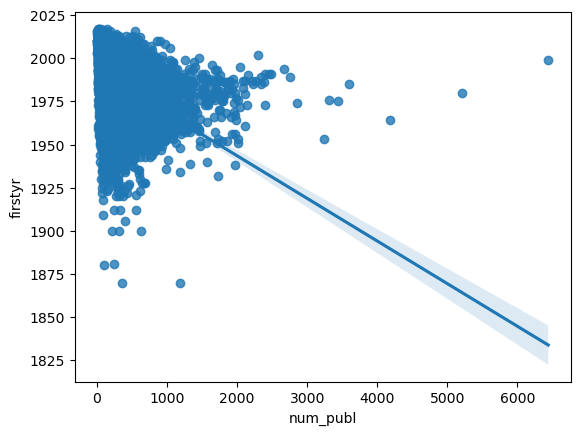

In [24]:
sb.regplot(y='firstyr', x='num_publ', data = data)

In [26]:
data['cntry'].tolist()

['usa',
 'aut',
 'che',
 'can',
 'usa',
 'usa',
 'can',
 'gbr',
 'usa',
 'usa',
 'irn',
 'usa',
 'usa',
 'deu',
 'can',
 'gbr',
 'usa',
 'gbr',
 'usa',
 'usa',
 'usa',
 'aus',
 'usa',
 'usa',
 'can',
 'usa',
 'usa',
 nan,
 'usa',
 'chn',
 'gbr',
 'che',
 'gbr',
 'deu',
 'can',
 'usa',
 'usa',
 'nld',
 'usa',
 'gbr',
 'usa',
 'usa',
 'usa',
 'usa',
 'gbr',
 'gbr',
 'esp',
 'usa',
 'chn',
 'usa',
 'usa',
 'usa',
 'usa',
 'usa',
 'gbr',
 'usa',
 'aus',
 'usa',
 'usa',
 'fra',
 'usa',
 'aus',
 'usa',
 'usa',
 'usa',
 'chn',
 'usa',
 'usa',
 'usa',
 'usa',
 'jpn',
 'usa',
 'usa',
 'usa',
 'deu',
 'usa',
 'usa',
 'usa',
 'sau',
 'usa',
 'nld',
 'fra',
 'usa',
 'hkg',
 'usa',
 'usa',
 'usa',
 'usa',
 'sgp',
 'can',
 'deu',
 'usa',
 'usa',
 'jpn',
 'nld',
 'usa',
 'gbr',
 'sau',
 'can',
 'usa',
 'usa',
 'usa',
 'usa',
 'usa',
 'aus',
 'usa',
 'usa',
 'usa',
 'usa',
 'dnk',
 'usa',
 'usa',
 'usa',
 'nld',
 'usa',
 'usa',
 'isr',
 'usa',
 'gbr',
 'usa',
 'usa',
 'usa',
 'can',
 nan,
 'usa',
 'us